***说明：本文依据《Sklearn 与 TensorFlow 机器学习实用指南》完成，所有版权和解释权均归作者和翻译成员所有，我只是搬运和做注解。***
第四章是对模型训练内部工作流程的了解，帮助炼丹师们找到恰当的学习模型、算法、数据集。  
**为了尽量简单（懒），在这里默认已经了解线性回归、多项式回归、损失函数、梯度下降**
### 1. 简单的线性回归模型，讨论两种不同训练方法的最优解
- 封闭方程求根运算，得到模型在当前训练集上的最优解。
- 迭代优化（梯度下降GD），调整模型参数获取最小损失函数。批量梯度下降、随机梯度下降、小批量梯度下降。
### 2. 多项式回归，用来拟合非线性数据集
- 介绍正则方式减少过拟合的出现
- 介绍Logistic回归和Softmax回归

### 1. 线性回归
线性模型的描述指**通过计算输入变量的加权和，并加上一个常数偏置项（截距项）来得到一个预测值**。  
#### 线性回归模型的表示
y=θ_0+θ_1x_1+θ_2x_2+...+θ_nx_n  
- y表示预测结果
- n表示特征个数
- x_i表示第i个特征的数值
- θ_j表示第j个参数
y=h_θ(X)=θ^TX
- 这是上式的向量化表示，在吴恩达机器学习教程中有专门提到。
- θ^TX表示θ^T和X的点积
- h_θ(X)表示参数为θ的假设函数
#### 线性回归模型的训练
**均方根误差RMSE或均方误差MSE**，训练目标就是找到一个线性回归模型，让其RMSE或MSE最小。  
$$MSE(X, h_θ)=1/m\Sigma_{i=1}^m(\theta^TX^i-y^i)^2$$
#### 1. 公式求解损失函数（通过解正态方程直接得到最后的结果）
$$\theta=(X^TX)^{-1}X^Ty$$
- θ指最小化损失函数
- y是包含所有y值的向量
~~~python
# 生成随机数据检验方程
import numpy as np
import matplotlib.pyplot as plt
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()
~~~
使用正态方法计算θ，用到了numpy中的np.linalg.inv函数来计算矩阵的逆，dot函数来计算矩阵乘法。  
在计算后得到的结果是[[3.86595933] [3.0990605 ]]，这样就可以生成一条线拟合测试数据。  
根据第二三章，同样也可是使用Sklearn中的LinearRegression函数完成预测。
~~~python
import numpy as np
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2, 1)), X_new]
y_pred=X_new_b.dot(theta_best)
plt.plot(X_new,y_pred,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()
~~~
#### 2.复杂度计算
正态方程需要计算矩阵X.T*T，特征个数n，因此矩阵为n*n，其复杂度在n^2.4-n^3之间，因此特征个数会直接影响到求解的速度。为了应对这种问题，引入了梯度下降方法。
#### 3.梯度下降
**梯度下降是一种非常通用的优化算法，它能够很好地解决一系列问题。梯度下降的整体思路是通过的迭代来逐渐调整参数使得损失函数达到最小值。**  
- 随机初始值θ
- **超参数**学习率决定了参数步长的大小，以及时间开销，学习率过大或过小都会影响到学习结果。
- **梯度下降陷阱**，就是当损失函数出现不规则形状的时候，收敛到全局最小是很困难的，会出现收敛局部最小或跨越高原，都无法达到全局最小。
- 特征缩放，在使用梯度下降的时候，应该确保所有的特征又相近的尺度范围，使用**Sklearn的StandardScaler**，否则会影响到收敛结果。
#### 批量梯度下降
在梯度下降的过程中要计算每一个θ下的损失函数梯度，这个就是**偏导数**，在公式推导中，这个应该是初学者感觉最困难的地方，为了避免单独计算每一个偏导数，可以使用批量梯度下降。  
这边按照不同学习率生成了前100次的迭代，可以明显对比出来差别。在学习率为0.1得时候能够最快拟合，但是这个超参数的寻找是一个问题，教程在这里推荐了**网格搜索**。
~~~python
eta=0.1#学习率为0.1
for eta in [0.02,0.1,0.5]:
    print(eta)
    n_iterations=1000#迭代次数
    m=100
    theta=np.random.randn(2,1)
    theta_list=[]
    for iteration in range(n_iterations):
        gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta_list.append(theta)
        theta=theta-eta*gradients
    # print(theta)
    # print(theta_list)
    X_new=np.array([[0],[2]])
    X_new_b=np.c_[np.ones((2, 1)), X_new]
    for i in range(100):
        y_pred=X_new_b.dot(theta_list[i])
        plt.plot(X_new,y_pred,"b-")
    plt.plot(X,y,"b.")
    plt.axis([0,2,0,15])
    plt.show()
~~~
#### 随机梯度下降
批量梯度下降的一个问题是每一步梯度都需要使用整个数据集，在处理大规模数据的时候会十分慢。而随机梯度下降，每一步只选取训练集中的一个样本，提高了算法速率。  
由于损失函数的不规则性，可以跳过局部最小值，其效果要优于批量梯度下降。
但另一方面，由于随机性，呈现出更多的不规律性：它到达最小值不是平缓的下降，损失函数会忽高忽低，只是在大体上呈下降趋势。随着时间的推移，它会非常的靠近最小值，但是它不会停止在一个值上，它会一直在这个值附近摆动。因此，当算法停止的时候，最后的参数还不错，但不是最优值。  
随机性可以很好的跳过局部最优值，但同时它却不能达到最小值。解决这个难题的一个办法是逐渐降低学习率。 开始时，走的每一步较大（这有助于快速前进同时跳过局部最小值），然后变得越来越小，从而使算法到达全局最小值。 这个过程被称为模拟退火，因为它类似于熔融金属慢慢冷却的冶金学退火过程。 决定每次迭代的学习率的函数称为learning schedule。   
在Sklearn中使用SGDRegressor来实现随机梯度下降。
从图中可以看到每一步都是不规则的跳跃。  
~~~python
n_epochs = 50 
t0, t1 = 5, 50  
#learning_schedule的超参数
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)
sgd_theta_list=[]

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        sgd_theta_list.append(theta)
        theta = theta - eta * gradients
print(theta)
# print(sgd_theta_list)
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2, 1)), X_new]
for i in range(10):
    y_pred=X_new_b.dot(sgd_theta_list[i])
    plt.plot(X_new,y_pred,"b-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()
~~~
#### 小批量梯度下降
基于批量梯度和随机梯度，在迭代的每一步中，批量梯度使用整个数据集，随机梯度使用一个实例，小批量梯度使用随机的小型实例集。比随机梯度的主要优点在于你可以通过矩阵运算的硬件优化得到一个较好的训练表现，尤其当你使用 GPU 进行运算的时候。  
图中显示了训练期间三种梯度下降算法在参数空间中所采用的路径。
- 批量梯度的路径最后停在了最小值
- 随机梯度和小批量梯度最后都在最小值附近摆动。 
如果使用了一个较好的learning schedule，随机梯度和小批量梯度也可以得到最小值。
### 2. 多项式回归
当数据比直线更加复杂的时候，就需要使用多项式回归。  
#### 1. 生成数据
~~~python
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)
plt.plot(X,y,"b.")
plt.axis([-3,3,0,10])
plt.show()
~~~
#### 2. 训练模型
可以看到直线是无法拟合的，教程中使用了Sklearn的PolynomialFeatures进行了数据集转换，让训练集内每个特征的平方作为新特征
使用LinearRegression对数据进行拟合
~~~python
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
print(X[0:2])
print(X_poly[0:2])

linear_reg=LinearRegression()
linear_reg.fit(X_poly,y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = linear_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X,y,"b.")
plt.axis([-3,3,0,10])
plt.show()
~~~
#### 3. 学习曲线
教程在这里通过三种不同阶方程对刚才的数据进行了拟合，对比了过拟合和欠拟合
~~~python
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()
    polynormal_regression=Pipeline(
        [("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynormal_regression.fit(X,y)
    y_newbig=polynormal_regression.predict(X_new)
    plt.plot(X_new, y_newbig,style, label=str(degree),linewidth=width)
plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("high_degree_polynomials_plot")
plt.show()
~~~
这是一个简单线性回归的学习曲线
~~~python
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)
~~~
这是一个经过10阶处理后的学习曲线，和上面的对比会发现误差要比线性回归模型低的多
~~~python
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))
plot_learning_curves(polynomial_regression, X, y)
~~~
#### 4. 线性模型的正则化
降低模型的过拟合的好方法是正则化这个模型（即限制它）：模型有越少的自由度，就越难以拟合数据。例如，正则化一个多项式模型，一个简单的方法就是减少多项式的阶数。  
对于一个线性模型，正则化的典型实现就是约束模型中参数的权重。教程讲了四种不同约束权重的方法：Ridge回归（岭回归），Lasso回归、Elastic Net（弹性网络）Early Stopping（早期停止法）。
- 岭回归调用sklearn.linear_model import Ridge
- Lasso回归调用sklearn.linear_model import Lasso
- 弹性网络调用sklearn.linear_model import ElasticNet
- 早期停止法在SGDRegressor中设定warm_start=True


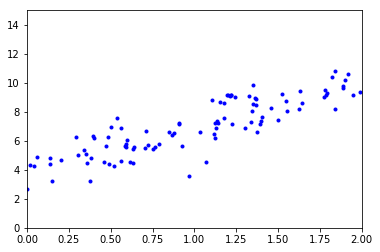

In [4]:
# 生成随机数据检验方程
import numpy as np
import matplotlib.pyplot as plt
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

使用正态方法计算θ，用到了numpy中的np.linalg.inv函数来计算矩阵的逆，dot函数来计算矩阵乘法。  
在计算后得到的结果是[[3.86595933] [3.0990605 ]]，这样就可以生成一条线拟合测试数据。  
根据第二三章，同样也可是使用Sklearn中的LinearRegression函数完成预测。

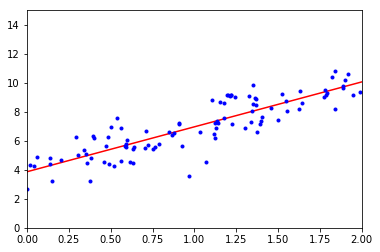

In [15]:
import numpy as np
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2, 1)), X_new]
y_pred=X_new_b.dot(theta_best)
plt.plot(X_new,y_pred,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

#### 2.复杂度计算
正态方程需要计算矩阵X.T*T，特征个数n，因此矩阵为n*n，其复杂度在n^2.4-n^3之间，因此特征个数会直接影响到求解的速度。为了应对这种问题，引入了梯度下降方法。
#### 3.梯度下降
**梯度下降是一种非常通用的优化算法，它能够很好地解决一系列问题。梯度下降的整体思路是通过的迭代来逐渐调整参数使得损失函数达到最小值。**  
- 随机初始值θ
- **超参数**学习率决定了参数步长的大小，以及时间开销，学习率过大或过小都会影响到学习结果。
- **梯度下降陷阱**，就是当损失函数出现不规则形状的时候，收敛到全局最小是很困难的，会出现收敛局部最小或跨越高原，都无法达到全局最小。
- 特征缩放，在使用梯度下降的时候，应该确保所有的特征又相近的尺度范围，使用**Sklearn的StandardScaler**，否则会影响到收敛结果。
#### 批量梯度下降
在梯度下降的过程中要计算每一个θ下的损失函数梯度，这个就是**偏导数**，在公式推导中，这个应该是初学者感觉最困难的地方，为了避免单独计算每一个偏导数，可以使用批量梯度下降。  
这边按照不同学习率生成了前100次的迭代，可以明显对比出来差别。在学习率为0.1得时候能够最快拟合，但是这个超参数的寻找是一个问题，教程在这里推荐了**网格搜索**。

0.02


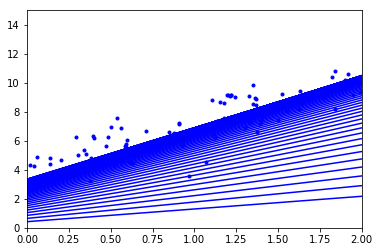

0.1


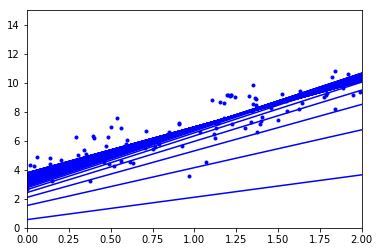

0.5


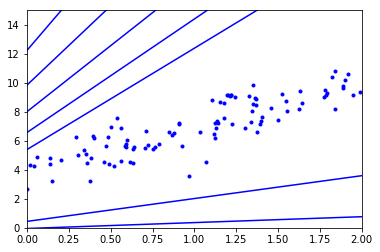

In [32]:
eta=0.1#学习率为0.1
for eta in [0.02,0.1,0.5]:
    print(eta)
    n_iterations=1000#迭代次数
    m=100
    theta=np.random.randn(2,1)
    theta_list=[]
    for iteration in range(n_iterations):
        gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta_list.append(theta)
        theta=theta-eta*gradients
    # print(theta)
    # print(theta_list)
    X_new=np.array([[0],[2]])
    X_new_b=np.c_[np.ones((2, 1)), X_new]
    for i in range(100):
        y_pred=X_new_b.dot(theta_list[i])
        plt.plot(X_new,y_pred,"b-")
    plt.plot(X,y,"b.")
    plt.axis([0,2,0,15])
    plt.show()

#### 随机梯度下降
批量梯度下降的一个问题是每一步梯度都需要使用整个数据集，在处理大规模数据的时候会十分慢。而随机梯度下降，每一步只选取训练集中的一个样本，提高了算法速率。  
由于损失函数的不规则性，可以跳过局部最小值，其效果要优于批量梯度下降。
但另一方面，由于随机性，呈现出更多的不规律性：它到达最小值不是平缓的下降，损失函数会忽高忽低，只是在大体上呈下降趋势。随着时间的推移，它会非常的靠近最小值，但是它不会停止在一个值上，它会一直在这个值附近摆动。因此，当算法停止的时候，最后的参数还不错，但不是最优值。  
随机性可以很好的跳过局部最优值，但同时它却不能达到最小值。解决这个难题的一个办法是逐渐降低学习率。 开始时，走的每一步较大（这有助于快速前进同时跳过局部最小值），然后变得越来越小，从而使算法到达全局最小值。 这个过程被称为模拟退火，因为它类似于熔融金属慢慢冷却的冶金学退火过程。 决定每次迭代的学习率的函数称为learning schedule。   
在Sklearn中使用SGDRegressor来实现随机梯度下降。
从图中可以看到每一步都是不规则的跳跃。  

In [39]:
n_epochs = 50 
t0, t1 = 5, 50  #learning_schedule的超参数

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)
sgd_theta_list=[]

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        sgd_theta_list.append(theta)
        theta = theta - eta * gradients
print(theta)
# print(sgd_theta_list)


[[3.86740238]
 [3.07428891]]


X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2, 1)), X_new]
for i in range(10):
    y_pred=X_new_b.dot(sgd_theta_list[i])
    plt.plot(X_new,y_pred,"b-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

#### 小批量梯度下降
基于批量梯度和随机梯度，在迭代的每一步中，批量梯度使用整个数据集，随机梯度使用一个实例，小批量梯度使用随机的小型实例集。比随机梯度的主要优点在于你可以通过矩阵运算的硬件优化得到一个较好的训练表现，尤其当你使用 GPU 进行运算的时候。  
图中显示了训练期间三种梯度下降算法在参数空间中所采用的路径。
- 批量梯度的路径最后停在了最小值
- 随机梯度和小批量梯度最后都在最小值附近摆动。 
如果使用了一个较好的learning schedule，随机梯度和小批量梯度也可以得到最小值。

### 2. 多项式回归
当数据比直线更加复杂的时候，就需要使用多项式回归。  
#### 1. 生成数据

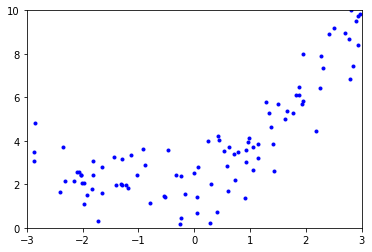

In [45]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)
plt.plot(X,y,"b.")
plt.axis([-3,3,0,10])
plt.show()

[[1.88608949]
 [2.97775142]]
[[1.88608949 3.55733355]
 [2.97775142 8.8670035 ]]


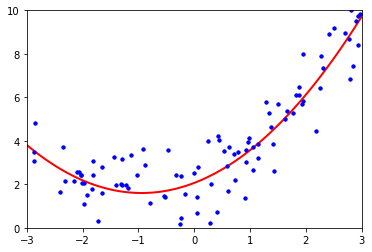

In [59]:
# 可以看到直线是无法拟合的，教程中使用了Sklearn的PolynomialFeatures进行了数据集转换，让训练集内每个特征的平方作为新特征
# 使用LinearRegression对数据进行拟合
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
print(X[0:2])
print(X_poly[0:2])

linear_reg=LinearRegression()
linear_reg.fit(X_poly,y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = linear_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X,y,"b.")
plt.axis([-3,3,0,10])
plt.show()

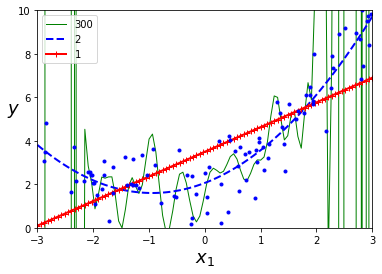

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()
    polynormal_regression=Pipeline(
        [("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynormal_regression.fit(X,y)
    y_newbig=polynormal_regression.predict(X_new)
    plt.plot(X_new, y_newbig,style, label=str(degree),linewidth=width)
plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("high_degree_polynomials_plot")
plt.show()
        

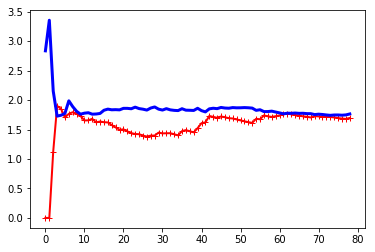

In [65]:
# 这是一个简单线性回归的学习曲线
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

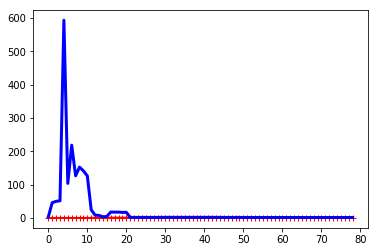

In [66]:
# 这是一个经过10阶处理后的学习曲线，和上面的对比会发现误差要比线性回归模型低的多
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))
plot_learning_curves(polynomial_regression, X, y)

#### 5. 线性模型的正则化
降低模型的过拟合的好方法是正则化这个模型（即限制它）：模型有越少的自由度，就越难以拟合数据。例如，正则化一个多项式模型，一个简单的方法就是减少多项式的阶数。  
对于一个线性模型，正则化的典型实现就是约束模型中参数的权重。教程讲了四种不同约束权重的方法：Ridge回归（岭回归），Lasso回归、Elastic Net（弹性网络）Early Stopping（早期停止法）。
- 岭回归调用sklearn.linear_model import Ridge
- Lasso回归调用sklearn.linear_model import Lasso
- 弹性网络调用sklearn.linear_model import ElasticNet
- 早期停止法在SGDRegressor中设定warm_start=True


***说明：本文依据《Sklearn 与 TensorFlow 机器学习实用指南》完成，所有版权和解释权均归作者和翻译成员所有，我只是搬运和做注解。***
第四章是对模型训练内部工作流程的了解，帮助炼丹师们找到恰当的学习模型、算法、数据集。  
**为了尽量简单（懒），在这里默认已经了解线性回归、多项式回归、损失函数、梯度下降**
### 1. 简单的线性回归模型，讨论两种不同训练方法的最优解
- 封闭方程求根运算，得到模型在当前训练集上的最优解。
- 迭代优化（梯度下降GD），调整模型参数获取最小损失函数。批量梯度下降、随机梯度下降、小批量梯度下降。
### 2. 多项式回归，用来拟合非线性数据集
- 介绍正则方式减少过拟合的出现
### 3. 介绍Logistic回归
### 4. 介绍Softmax回归

### 3. 逻辑回归
逻辑回归用于估计实例属于某个类别的概率，其实就是二分类器。  
#### 概率估计
逻辑回归模型计算输入的特征加权总和，再输入logistic函数进行处理后输出。生成一个逻辑方法图示，根据逻辑回归模型的输出值预测y  
$\sigma(t) = \frac{1}{1 + e^{-t}}$
#### 训练和损失函数
训练是为了得到θ使正例概率增大，负例概率减小，可以通过单个训练实例X的损失函数实现。
公式
逻辑回归损失函数（对数损失）  
公式
OK，得到这个损失函数之后如何求解？  
无解的，因为没有等价的正态方程，但是这个损失函数是凸函数，可以通过求偏导数优化获取全局最小值。  
公式
#### 决策边界
在这里使用iris数据库来分析逻辑回归。  
iris中有三种Setosa，Versicolor，Virginica，可以建立一个分类器，通过花瓣宽度特征来识别Virginica。
#### 1.加载数据
可以看到data项目中有四种字段[5.1, 3.5, 1.4, 0.2]，这里只获取data中第三列数据。  
对y数据进行处理，将label转为虚拟变量，这部分在机器学习Day3（https://www.toutiao.com/i6635207113838690820/） 中有介绍。 
~~~python
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
iris=datasets.load_iris()
list(iris.keys())
X=iris['data'][:,3:]
y=(iris["target"] == 2).astype(np.int)
~~~
#### 2.训练模型
~~~python
log_reg=LogisticRegression()
log_reg.fit(X,y)
~~~
#### 3.评估模型
评估模型，设定花瓣宽度从0到3厘米
~~~python
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-virginica")
plt.show()
~~~
#### 4.确定决策边界
Virginica 花的花瓣宽度在1.4厘米到2.5厘米之间，而其他种类的花通常具有较小的花瓣宽度，范围从0.1厘米到1.8厘米。因此，分类器在发现2厘米以上时会给出高概率值，在1厘米以下时会给出低概率值，基于上图，进一步绘制决策边界来观察。可以发现1.6厘米时一个决策边界。当数值大于1.6的时候判定为是，小于1.6是判定为否。  
~~~python
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
# X_new[y_proba[:,1]>=0.5]指label高于50%的label，就是预测确定为Iris-virginica
decision_boundary=X_new[y_proba[:,1]>=0.5][0]

plt.figure(figsize=(8,3))
#低概率,blue,square=>bs
plt.plot(X[y==0],y[y==0],"bs")
#高概率,green,^=>g^
plt.plot(X[y==1],y[y==1],"g^")
#决策边界
plt.plot([decision_boundary,decision_boundary],[0,2],"k:",linewidth=2)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-virginica")
#箭头标识
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()
#可以发现决策边界为1.6156
print(decision_boundary) #=>1.61561562
log_reg.predict([[1.62],[1.58]]) #array([1, 0])
~~~
接下来教程引入两个特征来进行预测。图很骚啊，这段代码要好好看
~~~python
X_double=iris['data'][:,(2,3)]
y_double=(iris["target"] == 2).astype(np.int)
log_reg_double=LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg_double.fit(X_double,y_double)
x0,x1=np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
#ravel()：将多维数组转为一维数组，如果没有必要，不会产生源数据的副本 
X_new_double=np.c_[x0.ravel(),x1.ravel()]
y_proba=log_reg_double.predict_proba(X_new_double)
plt.figure(figsize=(10, 4))
plt.plot(X_double[y_double==0, 0], X_double[y_double==0, 1], "bs")
plt.plot(X_double[y_double==1, 0], X_double[y_double==1, 1], "g^")

zz=y_proba[:,1].reshape(x0.shape)
contour=plt.contour(x0,x1,zz,cmap=plt.cm.brg)

left_right=np.array([2.9,7])
#生成决策边界
boundary=-(log_reg_double.coef_[0][0] * left_right + log_reg_double.intercept_[0]) / log_reg_double.coef_[0][1]

plt.clabel(contour,inline=1,fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)

#文字描述和标签描述
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()
~~~

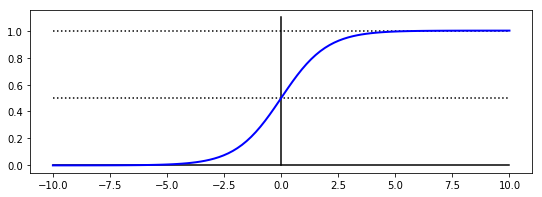

In [72]:
t=np.linspace(-10,10,100)
sig=1/(1+np.exp(-t))
plt.figure(figsize=(9,3))
#生成基准线，0,0
plt.plot([-10,10],[0,0],"k-")
#生成参考坐标线0.5,0.5和1,1
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
#生成纵坐标
plt.plot([0,0],[0,1.1],"k-")
plt.plot(t,sig,"b-",linewidth=2)
plt.show()

In [79]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
iris=datasets.load_iris()
list(iris.keys())
X=iris['data'][:,3:]
y=(iris["target"] == 2).astype(np.int)

In [81]:
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

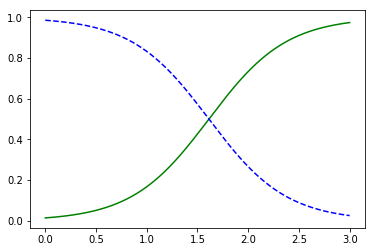

In [84]:
#评估模型，设定花瓣宽度从0到3厘米
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-virginica")
plt.show()

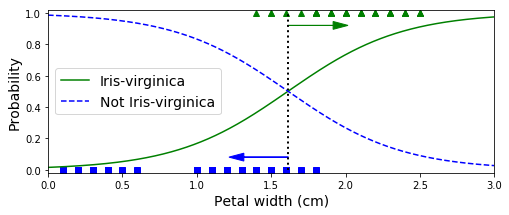

[1.61561562]


array([1, 0])

In [104]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
# X_new[y_proba[:,1]>=0.5]指label高于50%的label，就是预测确定为Iris-virginica
decision_boundary=X_new[y_proba[:,1]>=0.5][0]

plt.figure(figsize=(8,3))
#低概率,blue,square=>bs
plt.plot(X[y==0],y[y==0],"bs")
#高概率,green,^=>g^
plt.plot(X[y==1],y[y==1],"g^")
#决策边界
plt.plot([decision_boundary,decision_boundary],[0,2],"k:",linewidth=2)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-virginica")
#箭头标识
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()
#可以发现决策边界为1.6156
print(decision_boundary) #=>1.61561562
log_reg.predict([[1.62],[1.58]]) #array([1, 0])

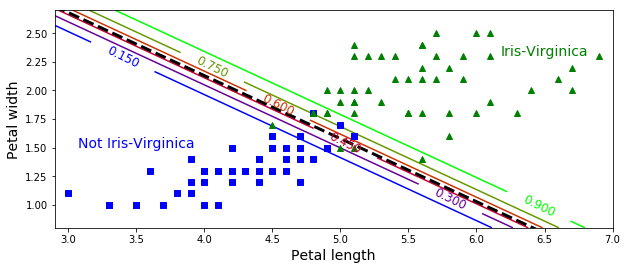

In [116]:
X_double=iris['data'][:,(2,3)]
y_double=(iris["target"] == 2).astype(np.int)
log_reg_double=LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg_double.fit(X_double,y_double)
x0,x1=np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
#ravel()：将多维数组转为一维数组，如果没有必要，不会产生源数据的副本 
X_new_double=np.c_[x0.ravel(),x1.ravel()]
y_proba=log_reg_double.predict_proba(X_new_double)
plt.figure(figsize=(10, 4))
plt.plot(X_double[y_double==0, 0], X_double[y_double==0, 1], "bs")
plt.plot(X_double[y_double==1, 0], X_double[y_double==1, 1], "g^")

zz=y_proba[:,1].reshape(x0.shape)
contour=plt.contour(x0,x1,zz,cmap=plt.cm.brg)

left_right=np.array([2.9,7])
#生成决策边界
boundary=-(log_reg_double.coef_[0][0] * left_right + log_reg_double.intercept_[0]) / log_reg_double.coef_[0][1]

plt.clabel(contour,inline=1,fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)

#文字描述和标签描述
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

***说明：本文依据《Sklearn 与 TensorFlow 机器学习实用指南》完成，所有版权和解释权均归作者和翻译成员所有，我只是搬运和做注解。***
第四章是对模型训练内部工作流程的了解，帮助炼丹师们找到恰当的学习模型、算法、数据集。  
**为了尽量简单（懒），在这里默认已经了解线性回归、多项式回归、损失函数、梯度下降**
### 1. 简单的线性回归模型，讨论两种不同训练方法的最优解
- 封闭方程求根运算，得到模型在当前训练集上的最优解。
- 迭代优化（梯度下降GD），调整模型参数获取最小损失函数。批量梯度下降、随机梯度下降、小批量梯度下降。
### 2. 多项式回归，用来拟合非线性数据集
- 介绍正则方式减少过拟合的出现
### 3. 介绍Logistic回归
### 4. 介绍Softmax回归

### 4. 介绍Softmax回归
#### 原理
将逻辑回归推广到多类别分类，就是Softmax回归。  
这部分讲得比较系统，从逻辑回归推导到Softmax回归。每一类概率预测公式和线性回归预测公式一样。  
公式  
但是，因为是多类别分类，每一个分类的参数向量都是独立的，统一存放在参数矩阵Θ中。  
在计算了样本中每一类的得分后，通过Softmax函数计算出属于第k类的概率，然后通过除以所有份子总和进行归一化。  
公式  
- K表示有多少类
- S(X)表示包含样本X的每一类的得分向量
- σ(S(X))k表示给定每一类分数之后，实例X属于第k类的概率
在预测结果中，通过argmax计算函数的最大值，即返回σ(S(X))k最大时k的值。  
**注意：**Softmax回归分类一次只能输出一个类，无法像随机数森林那样同时针对多个输入处理后输出多个结果。在多人面部识别中无法使用。  
#### 训练Softmax回归
使用交叉熵进行训练。交叉熵能够应对y=1和y=0两种情况  
$$J(\Theta)=-1/m\Sigma_{i=1}^m\Sigma_{k=1}^ky_{k}^{(i)}log(p_{k}^{(i)})$$
然后对交叉熵公式求偏导  
$$\Delta_{\theta_k}J(\Theta)=1/m\Sigma_{i=1}^m(p_k^{(i)}-y_k^{(i)})X^{(i)}$$
通过计算每一类的梯度向量，使用优化算法使损失函数达到最小值。  
#### 使用Softmax回归对iris数据集进行分类

~~~python
X_multi=iris["data"][:,(2,3)]
y_multi=iris["target"]
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_multi,y_multi)
~~~
~~~python
x0_multi,x1_multi=np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1)
)
X_new_multi=np.c_[x0_multi.ravel(),x1_multi.ravel()]
y_proba_multi=softmax_reg.predict_proba(X_new_multi)
y_pred=softmax_reg.predict(X_new_multi)
zzl=y_proba[:,1].reshape(x0_multi.shape)
zz_multi=y_pred.reshape(x0_multi.shape)

plt.figure(figsize=(10,4))
plt.plot(X_multi[y_multi==2,0],X_multi[y_multi==2,1],"g^",label="Iris-Vir")
plt.plot(X_multi[y_multi==1,0],X_multi[y_multi==1,1],"bs",label="Iris-Ver")
plt.plot(X_multi[y_multi==0,0],X_multi[y_multi==0,1],"yo",label="Iris-Set")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0_multi, x1_multi, zz_multi, cmap=custom_cmap)
contour = plt.contour(x0_multi, x1_multi, zzl, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()
~~~

In [130]:
X_multi=iris["data"][:,(2,3)]
y_multi=iris["target"]
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_multi,y_multi)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

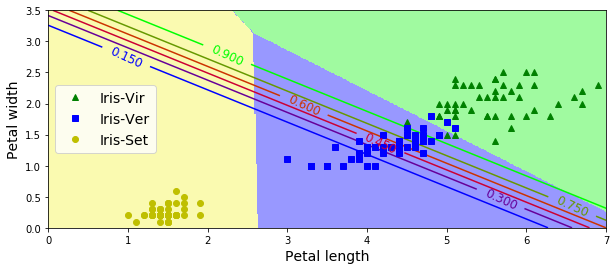

In [152]:
x0_multi,x1_multi=np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1)
)
X_new_multi=np.c_[x0_multi.ravel(),x1_multi.ravel()]

y_proba_multi=softmax_reg.predict_proba(X_new_multi)
y_pred=softmax_reg.predict(X_new_multi)

zz1=y_proba[:,1].reshape(x0_multi.shape)
zz_multi=y_pred.reshape(x0_multi.shape)

plt.figure(figsize=(10,4))
plt.plot(X_multi[y_multi==2,0],X_multi[y_multi==2,1],"g^",label="Iris-Vir")
plt.plot(X_multi[y_multi==1,0],X_multi[y_multi==1,1],"bs",label="Iris-Ver")
plt.plot(X_multi[y_multi==0,0],X_multi[y_multi==0,1],"yo",label="Iris-Set")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0_multi, x1_multi, zz_multi, cmap=custom_cmap)

contour_multi01 = plt.contour(x0_multi, x1_multi, zz1, cmap=plt.cm.brg)
# # contour_multi02 = plt.contour(x0_multi, x1_multi, zz_multi, cmap=plt.cm.brg)
plt.clabel(contour_multi01, inline=1, fontsize=12)
# plt.clabel(contour_multi02, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()



array([2])

In [133]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])